In [1]:
#Imagina que trabajas con los datos de 
#ventas de una tienda en línea. Tienes un archivo CSV con información de pedidos.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#Numero de registros
n = 20
np.random.seed(4)
#Datos
categories = ['Electronics', 'Clothing', 'Books', 'Home']
productos = {
    'Electronics': ['Laptop', 'Smartphone', 'Headphones'],
    'Clothing': ['T-shirt', 'Jeans', 'Jacket'],
    'Books': ['Novel', 'Comics', 'Biography'],
    'Home': ['Lamp', 'Chair', 'Cushion']
}
#Creamos los campos del dataframe
order_id = np.arange(1,n+1)
customer_id = np.random.choice(['C001', 'C002', 'C004', 'C005'], n)
order_date = pd.to_datetime(np.random.choice(pd.date_range(start='2025-01-01', end='2025-12-31'), n))
category = np.random.choice(categories, n)
product = [np.random.choice(productos[cat]) for cat in category]
quantity = np.random.randint(1,5, n)
unit_price = np.round(np.random.uniform(10, 500, n), 2)
discount = np.round(np.random.uniform(0,0.3,n),2)

#Creamos el dataframe
ventas = pd.DataFrame({
    'order_id':order_id,
    'customer_id':customer_id,
    'order_date':order_date,
    'category':category,
    'product':product,
    'quantity':quantity,
    'unit_price':unit_price,
    'discount':discount
})

print(ventas.head())

   order_id customer_id order_date     category     product  quantity  \
0         1        C004 2025-02-14  Electronics      Laptop         2   
1         2        C004 2025-10-22        Books   Biography         1   
2         3        C005 2025-05-07     Clothing      Jacket         4   
3         4        C002 2025-02-22  Electronics  Headphones         3   
4         5        C002 2025-01-01         Home     Cushion         2   

   unit_price  discount  
0      172.28      0.21  
1      290.35      0.15  
2      424.27      0.17  
3      431.90      0.25  
4      301.89      0.15  


In [2]:
#Crea una nueva columna total_price que sea quantity * unit_price * (1 - discount).
#Extrae el mes de order_date en una nueva columna order_month

ventas['total_price'] = ventas['quantity'] * ventas['unit_price'] * (1-ventas['discount'])
ventas['order_month'] = ventas['order_date'].dt.month_name()
print(ventas.head())

   order_id customer_id order_date     category     product  quantity  \
0         1        C004 2025-02-14  Electronics      Laptop         2   
1         2        C004 2025-10-22        Books   Biography         1   
2         3        C005 2025-05-07     Clothing      Jacket         4   
3         4        C002 2025-02-22  Electronics  Headphones         3   
4         5        C002 2025-01-01         Home     Cushion         2   

   unit_price  discount  total_price order_month  
0      172.28      0.21     272.2024    February  
1      290.35      0.15     246.7975     October  
2      424.27      0.17    1408.5764         May  
3      431.90      0.25     971.7750    February  
4      301.89      0.15     513.2130     January  


In [3]:
#¿Cuál es la categoría con mayores ventas totales?
ventas.groupby('category')['total_price'].sum().idxmax()
#¿Qué cliente ha gastado más?
ventas.groupby('customer_id')['total_price'].sum().idxmax()
#¿Cómo varían las ventas por mes?
print(ventas.groupby('order_month')['total_price'].sum())
#¿Cuál es el producto más vendido por unidades?
ventas.groupby('product')['quantity'].sum().idxmax()


order_month
December      304.8678
February     1926.5742
January      1579.5302
July         1703.0298
June         2025.3076
May          1760.5324
November      273.8032
October       246.7975
September      62.1552
Name: total_price, dtype: float64


np.str_('Jacket')

C:\Users\karl1\AppData\Local\Temp\ipykernel_2384\3145270643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_cat, x='category', y='total_price', palette= 'viridis')


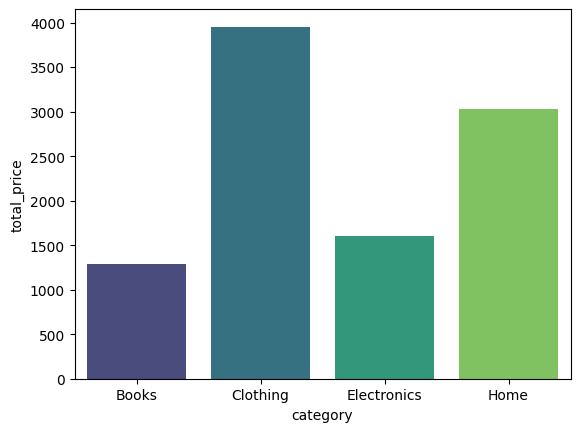

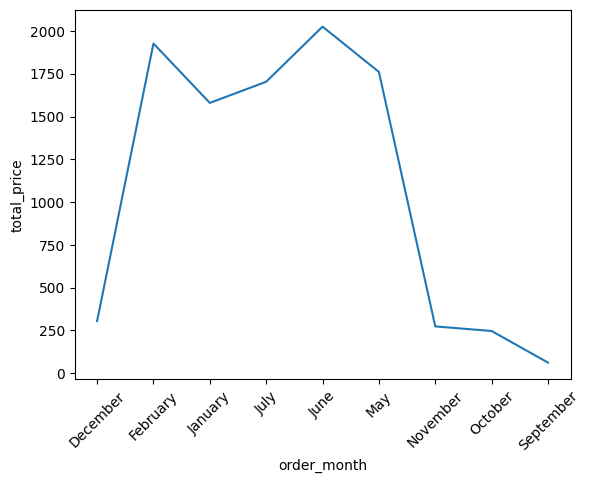

<Axes: xlabel='category', ylabel='total_price'>

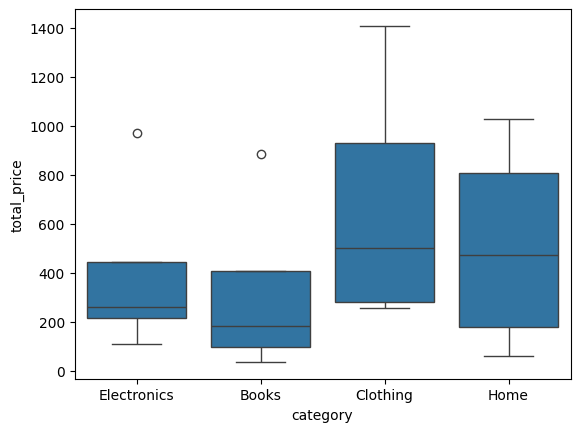

In [4]:
#Crear un barplot de ventas totales por categoría.
ventas_cat = ventas.groupby('category')['total_price'].sum().reset_index()
sns.barplot(data=ventas_cat, x='category', y='total_price', palette= 'viridis')
plt.show()
#Hacer un lineplot de ventas totales por mes.
ventas_por_mes = ventas.groupby('order_month')['total_price'].sum().reset_index()
sns.lineplot(data=ventas_por_mes, x='order_month', y='total_price')
plt.xticks(rotation=45)
plt.show()
#Crear un boxplot para ver la distribución de total_price por categoría.
sns.boxplot(data=ventas, x='category', y='total_price')
